## Importing required modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
anime_df = pd.read_csv('../data/anime.csv')
rating_df = pd.read_csv('../data/rating.csv')

## Dataset Description

In [5]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
rating_df.sample(5)

,user_id,anime_id,rating
7185432,67010,144,7
811431,7482,2798,7
2399925,22950,10790,8
759587,7087,3090,8
158148,1578,523,9


In [7]:
anime_df.shape

(12294, 7)

In [8]:
rating_df.shape

(7813737, 3)

In [9]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [10]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


## Data cleaning

Handling missing values

In [12]:
anime_df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

<Axes: >

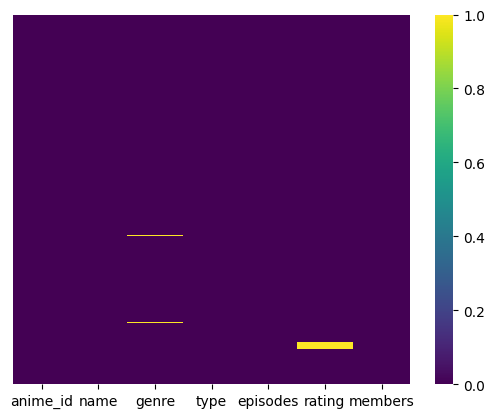

In [13]:
sns.heatmap(anime_df.isna(),cbar=True, yticklabels=False,cmap='viridis')

In [14]:
anime_df['genre'] = anime_df['genre'].fillna('unknown')

In [15]:
anime_df.dropna(subset=['type'],inplace=True)

In [16]:
anime_df.reset_index(drop=True,inplace=True)

In [17]:
anime_df.dropna(subset=['rating'],inplace=True,ignore_index=True)

In [18]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12064 non-null  int64  
 1   name      12064 non-null  object 
 2   genre     12064 non-null  object 
 3   type      12064 non-null  object 
 4   episodes  12064 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12064 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 659.9+ KB


In [19]:
anime_df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [20]:
rating_df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [21]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Handling duplicates

In [22]:
anime_df.duplicated().sum()

np.int64(0)

In [23]:
rating_df.duplicated().sum()

np.int64(1)

In [24]:
rating_df.drop_duplicates(inplace=True,ignore_index=True)

In [25]:
rating_df.duplicated().sum()

np.int64(0)

In [26]:
anime_df['genre'].head()

0                 Drama, Romance, School, Supernatural
1    Action, Adventure, Drama, Fantasy, Magic, Mili...
2    Action, Comedy, Historical, Parody, Samurai, S...
3                                     Sci-Fi, Thriller
4    Action, Comedy, Historical, Parody, Samurai, S...
Name: genre, dtype: object

Standardizing genre column

In [27]:
# Create a new column with list of genres
anime_df['genre_list'] = anime_df['genre'].astype(str).str.strip().str.split(',')


In [34]:
anime_df['genre_list'].head()

0            [Drama,  Romance,  School,  Supernatural]
1    [Action,  Adventure,  Drama,  Fantasy,  Magic,...
2    [Action,  Comedy,  Historical,  Parody,  Samur...
3                                  [Sci-Fi,  Thriller]
4    [Action,  Comedy,  Historical,  Parody,  Samur...
Name: genre_list, dtype: object

In [35]:
def to_lowercase_list(genre_list):
    # Converts every string in the input list to lowercase.
    return [genre.lower() for genre in genre_list]

anime_df['genre_list'] = anime_df['genre_list'].apply(to_lowercase_list)

In [36]:
anime_df[['genre','genre_list']]

,genre,genre_list
0,"Drama, Romance, School, Supernatural","[drama, romance, school, supernatural]"
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...","[action, adventure, drama, fantasy, magic,..."
2,"Action, Comedy, Historical, Parody, Samurai, S...","[action, comedy, historical, parody, samur..."
3,"Sci-Fi, Thriller","[sci-fi, thriller]"
4,"Action, Comedy, Historical, Parody, Samurai, S...","[action, comedy, historical, parody, samur..."
...,...,...
12059,Hentai,[hentai]
12060,Hentai,[hentai]
12061,Hentai,[hentai]
12062,Hentai,[hentai]


In [37]:
anime_df.to_csv('../data/cleaned_anime.csv',index=False)
rating_df.to_csv('../data/cleaned_ratings.csv',index=False)
